## Reddit network of user interactions in a specific thread

Capturing and visualising how users interact with each other on different threads.

- Green - Non-quarantined subs (gaming, aww...)
- Blue - Non-quarantined (changemyview)
- Yellow - Self defined echo chamber (the_donald)
- Red - Quarantined Subreddit (theredpill)

In [24]:
import praw
import csv

import networkx as nx
G=nx.Graph()

import matplotlib.pyplot as plt

# Authenticate into Reddit
reddit = praw.Reddit(client_id='1QKQYY6zEUgYUw',
                     client_secret='8xyLf9B_raDH9FIs54t3yzYqBqc',
                     password='redditpw',
                     user_agent='testscript by /u/praw_test_1',
                     username='praw_test_1')

In [6]:
# Function which takes in a thread_id, the node color and the subreddit name
# Visualises the relationship between each comment and their parent comment
# A user is a node. An edge is created when they reply to the comment/thread


def network_users_thread(thread_id, color,subreddit):
    
    G.clear()
    
    # Create CSV file with user interaction relationships
    with open('network_files/comments_'+thread_id+'.csv', mode='w') as comments_file:
        comments_file = csv.writer(comments_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        submission = reddit.submission(id=thread_id)
        submission.comments.replace_more(limit=None)

        for comment in submission.comments.list():
            parent = comment.parent()

            comments_file.writerow([comment.id, comment.author, parent.id, parent.author])

            for reply in comment.replies.list():
                reply_parent = reply.parent()

                comments_file.writerow([reply.id, reply.author, reply_parent.id, reply_parent.author])

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edge(row[1],row[3])

        nx.draw(G, node_size=100, alpha=0.4, node_color=color)
        # labels=nx.draw_networkx_labels(G,pos=nx.spring_layout(G),font_size=6)

        plt.title(subreddit)
        plt.show()
    

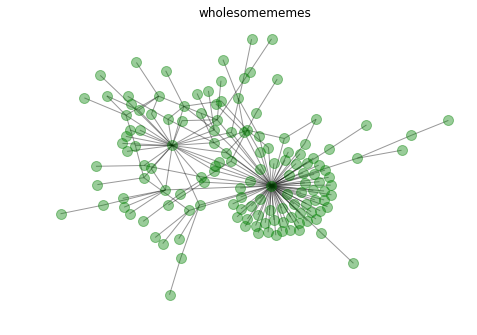

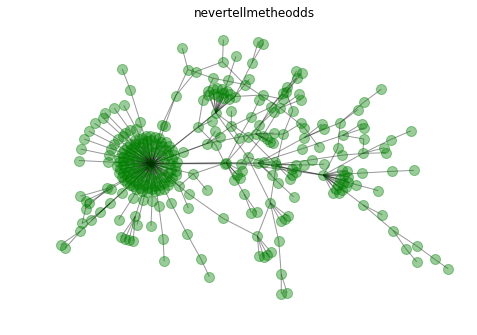

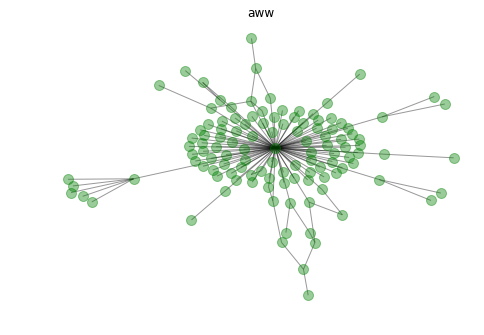

In [25]:
# https://www.reddit.com/r/wholesomememes/comments/bc9u05/well_raised_boy/
network_users_thread('bc9u05','g','wholesomememes')

# https://www.reddit.com/r/nevertellmetheodds/comments/bc91z0/that_some_miss/
network_users_thread('bc91z0','g','nevertellmetheodds')

#  https://www.reddit.com/r/aww/comments/bc88kx/drove_four_hours_to_meet_and_take_home_this/
network_users_thread('bc88kx','g','aww')

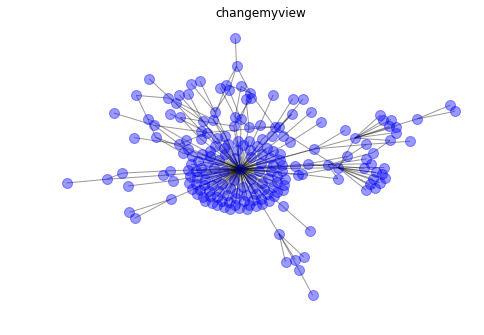

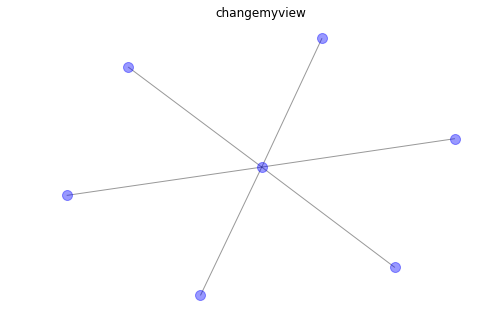

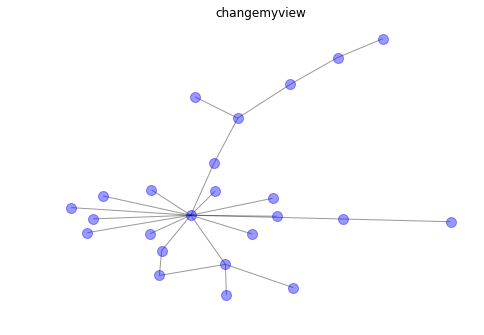

In [27]:
# https://www.reddit.com/r/changemyview/comments/bby3h7/cmv_barring_any_new_major_controversies_donald/
network_users_thread('bby3h7','b','changemyview')

# https://www.reddit.com/r/changemyview/comments/bc8ofq/cmv_people_who_claim_capitalism_caused_or_is/
network_users_thread('bc8ofq','b','changemyview')

# https://www.reddit.com/r/changemyview/comments/bc730b/cmv_discriminating_on_weight_is_not_the_same_as/
network_users_thread('bc730b','b','changemyview')

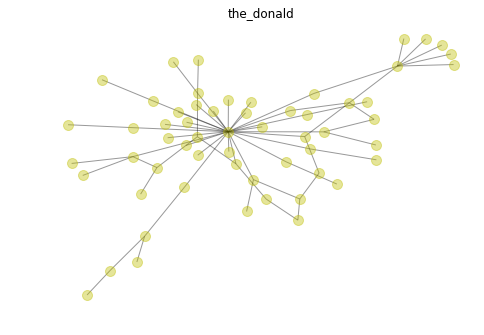

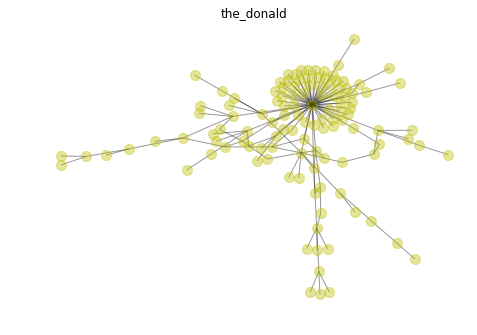

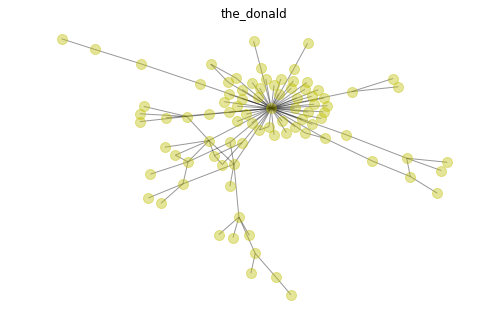

In [8]:
# https://www.reddit.com/r/The_Donald/comments/bc8on0/cnn_quick_change_the_narrative_to_something_that/
network_users_thread('bc8on0','y','the_donald')

# https://www.reddit.com/r/The_Donald/comments/bc6l6d/house_democrats_want_to_negotiate_a_2_trillion/
network_users_thread('bc6l6d','y','the_donald')

# https://www.reddit.com/r/The_Donald/comments/bc6zwx/and_the_radical_dems_reeling_in_disarray_as_the/
network_users_thread('bc6zwx','y','the_donald')

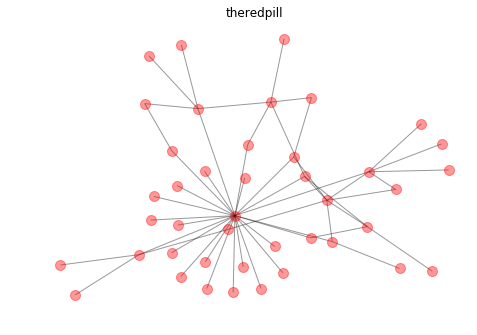

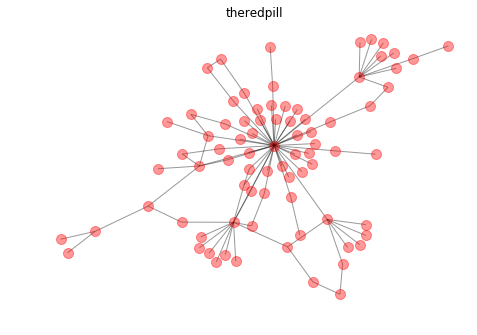

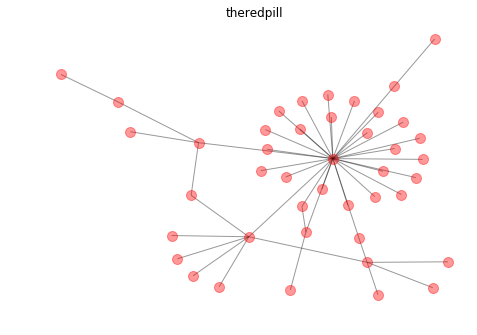

In [9]:
# https://www.reddit.com/r/TheRedPill/comments/baxqte/the_thing_you_really_want/
network_users_thread('baxqte','r','theredpill')

# https://www.reddit.com/r/TheRedPill/comments/bbl660/agree_and_amplify_why_it_is_such_an_important_tool/
network_users_thread('bbl660','r','theredpill')
    
# https://www.reddit.com/r/TheRedPill/comments/bbnnex/he_doesnt_deserve_you/
network_users_thread('bbnnex','r','theredpill')

In [22]:
# Degree Historgram Function

def histogram_users_thread(thread_id, color, subreddit):
    
    G.clear()

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edge(row[1],row[3])
        
        plt.hist(list(dict(nx.degree(G)).values()), color = color)
        plt.title("Degree Histogram for " + subreddit)
        plt.show()

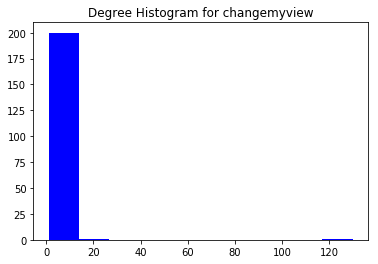

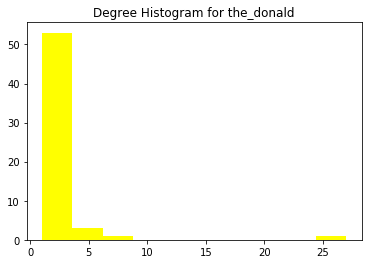

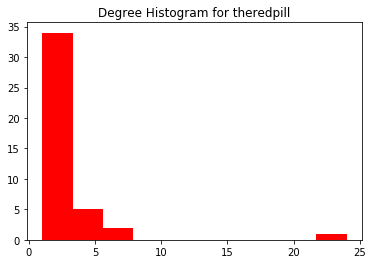

In [28]:
# https://www.reddit.com/r/changemyview/comments/bby3h7/cmv_barring_any_new_major_controversies_donald/
histogram_users_thread('bby3h7','blue','changemyview')

# https://www.reddit.com/r/The_Donald/comments/bc8on0/cnn_quick_change_the_narrative_to_something_that/
histogram_users_thread('bc8on0','yellow','the_donald')

# https://www.reddit.com/r/TheRedPill/comments/baxqte/the_thing_you_really_want/
histogram_users_thread('baxqte','red','theredpill')

In [29]:
# Degree Rank Plot Function

def degrank_users_thread(thread_id,color,subreddit):
    
    G.clear()

    # Open the CSV file and use to graph the network
    with open('network_files/comments_'+thread_id+'.csv') as commentsreader:
        commentsreader = csv.reader(commentsreader, delimiter=',', quotechar='|')
        for row in commentsreader:
            G.add_edge(row[1],row[3])

        degree_sequence=sorted([d for n,d in G.degree()],reverse=True) # degree sequence
        #print "Degree sequence", degree_sequence
        dmax=max(degree_sequence)

        plt.loglog(degree_sequence,'b-',marker='o', color=color)
        plt.title("Degree Rank Plot for " +subreddit)
        plt.ylabel("degree")
        plt.xlabel("rank")
    
    plt.show()

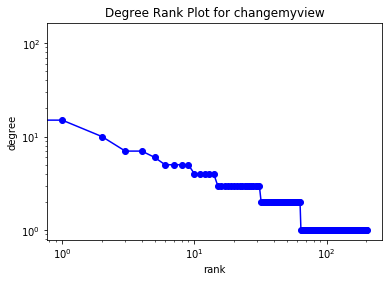

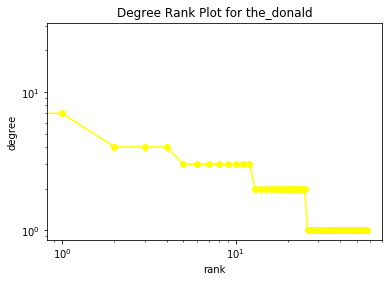

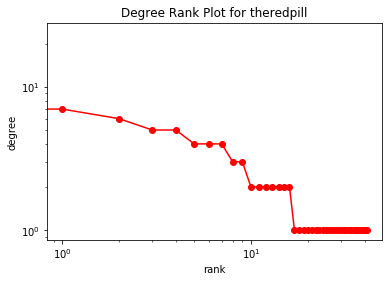

In [30]:
# https://www.reddit.com/r/changemyview/comments/bby3h7/cmv_barring_any_new_major_controversies_donald/
degrank_users_thread('bby3h7','blue','changemyview')

# https://www.reddit.com/r/The_Donald/comments/bc8on0/cnn_quick_change_the_narrative_to_something_that/
degrank_users_thread('bc8on0','yellow','the_donald')

# https://www.reddit.com/r/TheRedPill/comments/baxqte/the_thing_you_really_want/
degrank_users_thread('baxqte','red','theredpill')